In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")
sns.set_theme()

# Анализ фидбека РСЯ компании

In [3]:
feedback_df = pd.read_csv("data/data_01.csv", sep=";", header=3)
feedback_df.replace({',': '.'}, regex=True, inplace=True)
feedback_df.replace({'-': -1}, regex=False, inplace=True)
feedback_df["Дата"] = pd.to_datetime(feedback_df["Дата"], format="%d.%m.%Y")
feedback_df["№ Группы"] = feedback_df["№ Группы"].astype("string")
feedback_df.head()

,Дата,Группа,№ Группы,№ Объявления,Тип объявления,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),...,Конверсии/Клик по номеру телефона,Рентабельность,Доля рекламных расходов/Клик по email,Доля рекламных расходов/GTM - Отправка всех форм,Доля рекламных расходов/Клик по номеру телефона,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%)
0,2023-10-09,Брендовые - Общие,5297165573,M-15104907055,Текстово-графическое объявление,28,28.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
1,2023-10-09,Брендовые - Общие,5297165573,M-15104907056,Текстово-графическое объявление,3,3.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
2,2023-10-09,Брендовые - Общие,5297165573,M-15104907057,Текстово-графическое объявление,1,1.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
3,2023-10-09,Танк 300 - Общие,5297165574,M-15104907058,Текстово-графическое объявление,1,1.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
4,2023-10-09,Танк 300 - Общие,5297165574,M-15104907059,Текстово-графическое объявление,2,2.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1


In [4]:
print(f"nan values: {sum(feedback_df.isna().sum().to_list())}")
print(f"размерность:", *feedback_df.shape)
feedback_df.info()

nan values: 0
размерность: 1098 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Дата                                              1098 non-null   datetime64[ns]
 1   Группа                                            1098 non-null   object        
 2   № Группы                                          1098 non-null   string        
 3   № Объявления                                      1098 non-null   object        
 4   Тип объявления                                    1098 non-null   object        
 5   Показы                                            1098 non-null   int64         
 6   Взвешенные показы                                 1098 non-null   object        
 7   Клики                                             1098 non-null   int64        

In [5]:
# Числовые данные криво экспортируются из командера
for col in feedback_df.drop(columns=["Дата"]).columns:
    try:
        if col in ["№ Группы"]:
            continue
        isinstance(float(feedback_df[col][0]), float)
        feedback_df[col] = feedback_df[col].astype("float64")
    except ValueError:
        continue
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Дата                                              1098 non-null   datetime64[ns]
 1   Группа                                            1098 non-null   object        
 2   № Группы                                          1098 non-null   string        
 3   № Объявления                                      1098 non-null   object        
 4   Тип объявления                                    1098 non-null   object        
 5   Показы                                            1098 non-null   float64       
 6   Взвешенные показы                                 1098 non-null   float64       
 7   Клики                                             1098 non-null   float64       
 8   CTR (%)                     

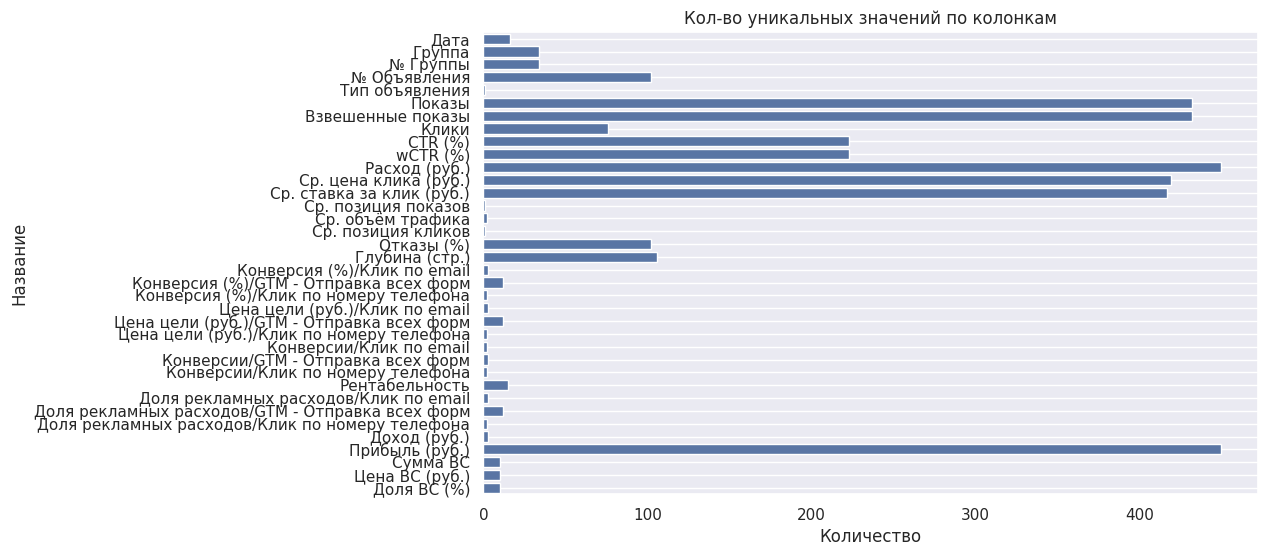

In [6]:
uniq_val_info = {}
for col in feedback_df.columns:
    uniq_val_info[col] = feedback_df[col].nunique()
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(
    y=uniq_val_info.keys(),
    x=uniq_val_info.values(),
    orient="h"
)
plt.grid()
plt.title("Кол-во уникальных значений по колонкам")
plt.ylabel("Название")
plt.xlabel("Количество")
plt.show()

In [ ]:
columns_to_drop = [
    "Дата",
    "Тип объявления",
    # "№ Объявления",
    "Доход (руб.)",
    "Доля рекламных расходов/Клик по номеру телефона",
    "Доля рекламных расходов/Клик по email",
    "Конверсии/Клик по номеру телефона",
    "Конверсии/Клик по email",
    "Цена цели (руб.)/Клик по номеру телефона",
    "Ср. позиция кликов",
    "Ср. объём трафика",
    "Ср. позиция показов",
]
analys_df = feedback_df.copy()
analys_df.drop(columns=columns_to_drop, inplace=True)

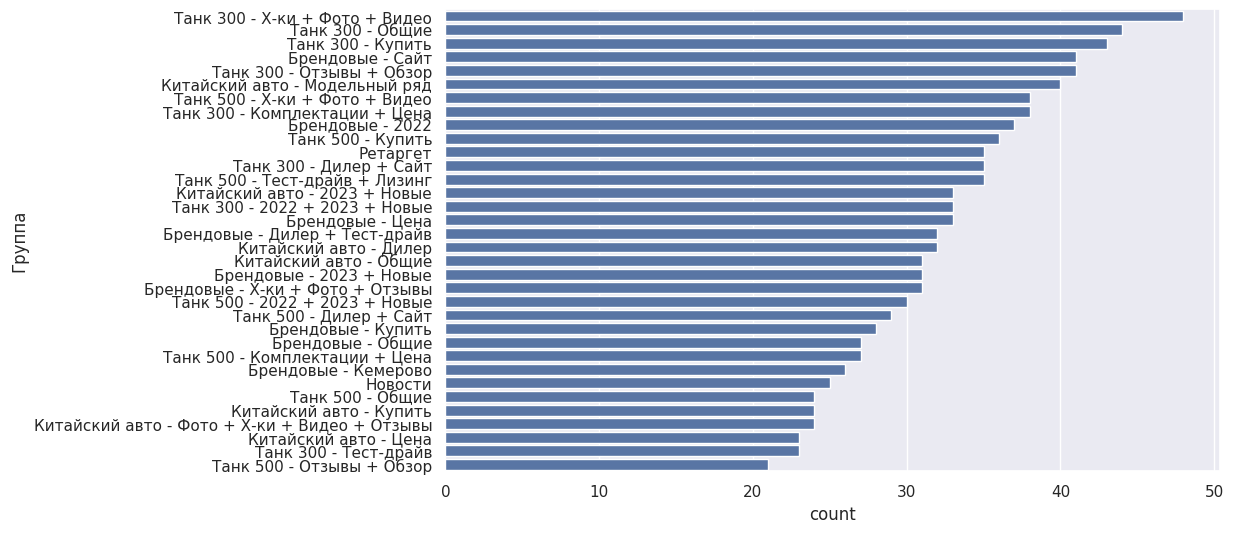

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    analys_df["Группа"].value_counts(),
    orient="h",
)
plt.show()

# Кластерный анализ

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [ ]:
columns_to_find_corr = [
    "Показы",
    "Взвешенные показы",
    "Клики",
    "CTR (%)",
    "wCTR (%)",
    "Расход (руб.)",
    "Ср. цена клика (руб.)",
    "Ср. ставка за клик (руб.)",
    "Отказы (%)",
    "Глубина (стр.)",
    "Прибыль (руб.)"
]
wcss_img = {}                    # Сумма внутрикластерных расстояний
percentage_error_diff = {}   # Процентные изменения WCSS
X = pd.get_dummies(analys_df[columns_to_find_corr])

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, init="k-means++", random_state=42)
    wcss_img[i] = kmeans.fit(X).inertia_

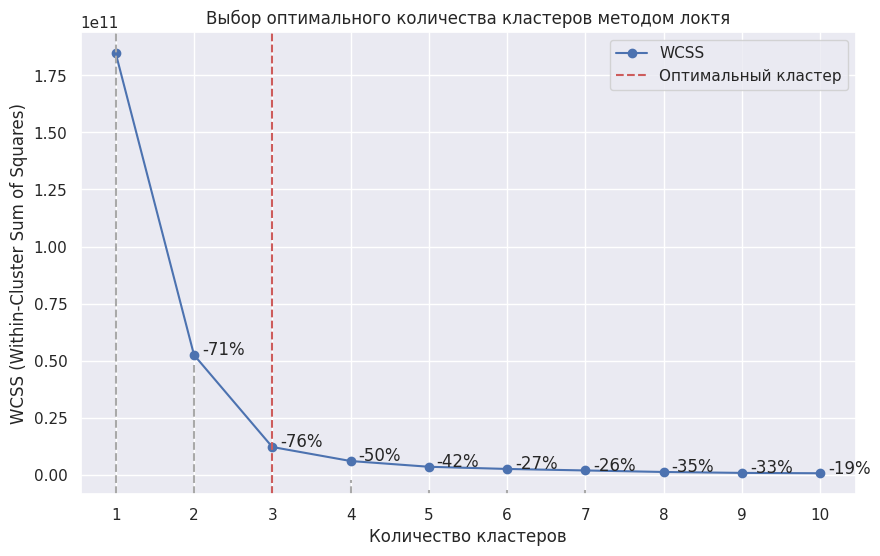

In [ ]:
# Строит график метода локтя для выбора оптимального количества кластеров
plt.figure(figsize=(10, 6))
plt.title("Выбор оптимального количества кластеров методом локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.plot(wcss_img.keys(), wcss_img.values(), marker='o', label="WCSS")

wcss_values = list(wcss_img.values())
max_val = max(wcss_values)
for i in range(len(wcss_values) - 1):
    diff = wcss_values[i] - wcss_values[i + 1]
    percentage_error_diff[f"{i+1}-{i+2}"] = int(diff * 100 / wcss_values[i])
    plt.text(x=i + 2.1, y=wcss_values[i + 1] + 200, s=f"-{int(diff * 100 / wcss_values[i])}%")
    plt.axvline(x=i + 1, color="darkgray", linestyle="--", ymax=int(wcss_values[i] * 100 / max_val) / 100)
plt.axvline(3, color="indianred", label="Оптимальный кластер", linestyle="--")
plt.legend()
plt.show()

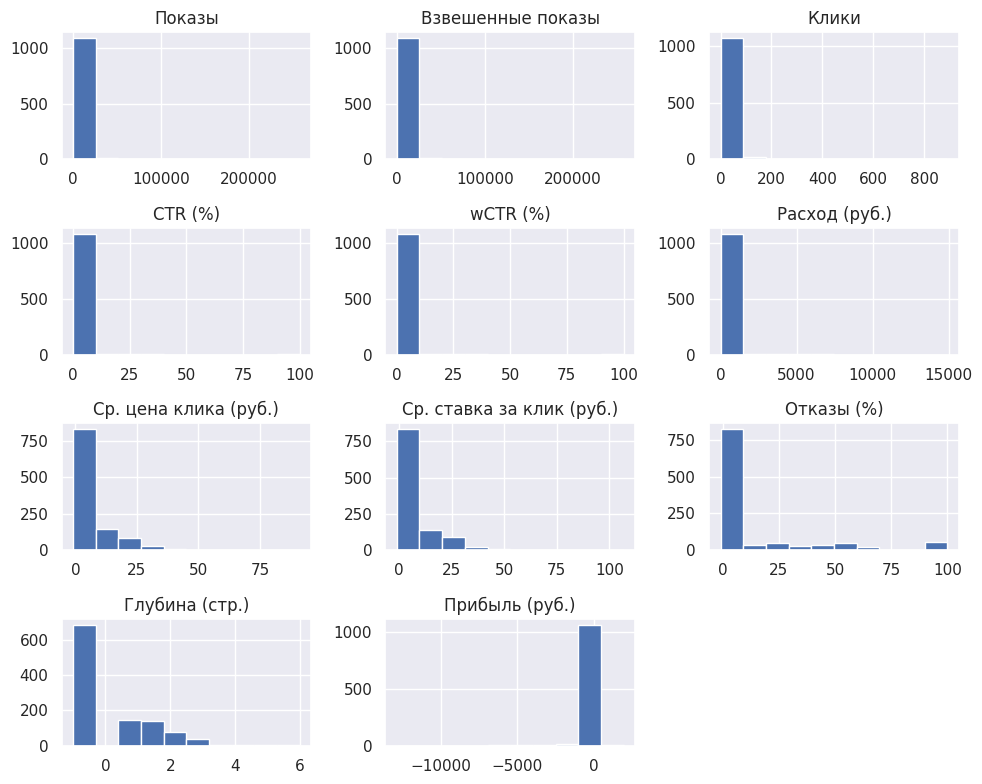

In [12]:
analys_df[columns_to_find_corr].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

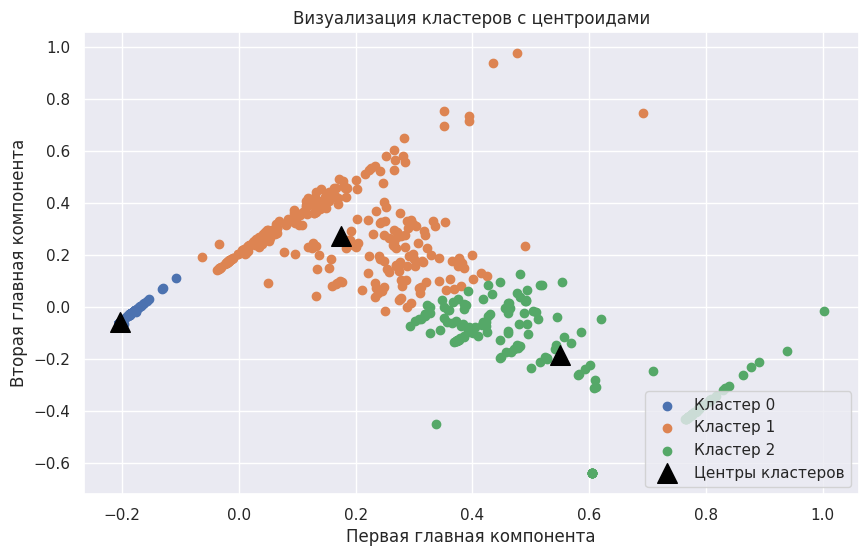

,cluster_id,counting
0,0,673
1,1,257
2,2,168


In [13]:
# Понижение размерности для визуализации
pca = PCA(n_components=2)
pca_df = pca.fit_transform(MinMaxScaler().fit_transform(analys_df[columns_to_find_corr])) 
pca_df = pd.DataFrame(pca_df)
kmeans = KMeans(n_clusters=3, max_iter=1000, init="k-means++", random_state=42)
predict = kmeans.fit_predict(pca_df)
# Визуализация кластров
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
for i in np.unique(predict):
    plt.scatter(pca_df.iloc[predict == i, 0], pca_df.iloc[predict == i, 1], label=f'Кластер {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='^', label='Центры кластеров')
plt.legend(loc='lower right')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Визуализация кластеров с центроидами')
plt.show()
sr = pd.DataFrame(pd.Series(predict).value_counts()).reset_index()
sr.columns = ["cluster_id", "counting"]
sr.head()

In [14]:
analys_df["cluster"] = predict
cluster_0 = analys_df.copy().query("cluster==0")
cluster_0[["Ср. цена клика (руб.)", "Глубина (стр.)", "Расход (руб.)", "Клики", "Отказы (%)", "Показы"]].describe()

,Ср. цена клика (руб.),Глубина (стр.),Расход (руб.),Клики,Отказы (%),Показы
count,673.000000,673.0,673.000000,673.000000,673.000000,673.000000
mean,-0.603016,-1.0,0.488826,0.092125,-0.998514,39.043091
std,1.838658,0.0,2.448142,0.412398,0.038547,123.838519
min,-1.000000,-1.0,0.000000,0.000000,-1.000000,0.000000
25%,-1.000000,-1.0,0.000000,0.000000,-1.000000,2.000000
50%,-1.000000,-1.0,0.000000,0.000000,-1.000000,7.000000
75%,-1.000000,-1.0,0.000000,0.000000,-1.000000,26.000000
max,21.570000,-1.0,26.710000,4.000000,0.000000,1901.000000


In [15]:
analys_df["cluster"] = predict
cluster_1 = analys_df.copy().query("cluster==1")
cluster_1[["Ср. цена клика (руб.)", "Глубина (стр.)", "Расход (руб.)", "Клики", "Отказы (%)"]].describe()

,Ср. цена клика (руб.),Глубина (стр.),Расход (руб.),Клики,Отказы (%)
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,16.953346,1.854942,405.044436,22.241245,10.388521
std,11.396276,0.921862,1358.785501,71.138044,12.766555
min,1.520000,-1.000000,1.520000,1.000000,-1.000000
25%,8.600000,1.140000,18.880000,1.000000,0.000000
50%,15.710000,1.690000,57.780000,4.000000,0.000000
75%,21.420000,2.210000,185.300000,14.000000,20.910000
max,91.210000,6.000000,14919.740000,891.000000,40.000000


In [16]:
cluster_1["Глубина (стр.)"].mean(), cluster_1["Глубина (стр.)"].std()

(np.float64(1.8549416342412453), np.float64(0.9218621272925693))

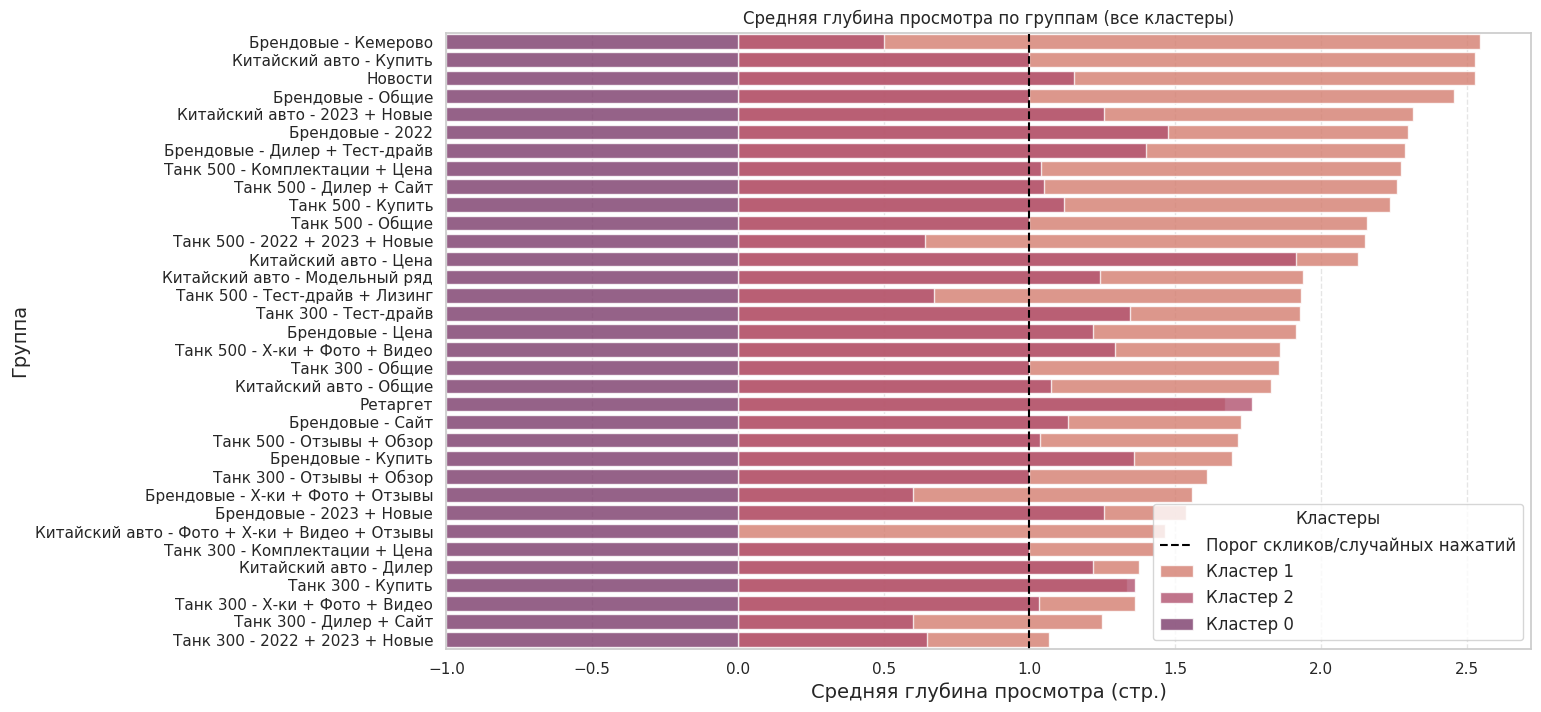

In [17]:
stat = analys_df.groupby(["Группа", "cluster"])["Глубина (стр.)"]\
    .mean()\
    .reset_index()\
    .sort_values(by="Глубина (стр.)", ascending=False)
plt.figure(figsize=(14, 8))
palette = sns.color_palette("flare", len(stat["cluster"].unique()))
sns.set_theme(style="whitegrid", palette="deep")
ax = None
for cluster_id, color in zip(stat["cluster"].unique(), palette):
    cluster_data = stat[stat["cluster"] == cluster_id]
    sns.barplot(
        x=cluster_data["Глубина (стр.)"], 
        y=cluster_data["Группа"], 
        label=f"Кластер {cluster_id}",  
        color=color,
        order=stat["Группа"].unique(),
        alpha=0.8
    )
plt.axvline(1, color="black", label="Порог скликов/случайных нажатий", linestyle="--")
plt.title("Средняя глубина просмотра по группам (все кластеры)")
plt.xlabel("Средняя глубина просмотра (стр.)", fontsize=14)
plt.ylabel("Группа", fontsize=14)
plt.legend(title="Кластеры", loc="lower right", fontsize=12)
plt.xlim(-1)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


In [18]:
# import phik

# plt.title("Коэффициент Phik")
# s = analys_df[["Ср. цена клика (руб.)", "Глубина (стр.)", "Расход (руб.)", "Клики", "Отказы (%)", "cluster"]].copy()
# s["cluster"] = s["cluster"].astype("object")
# sns.heatmap(pd.get_dummies(s).phik_matrix().round(2), annot=True)
# plt.show()

In [19]:
analys_df[
    analys_df["cluster"]==2
][["Ср. цена клика (руб.)", "Глубина (стр.)", "Расход (руб.)", "Клики", "Отказы (%)", "cluster"]].describe()

,Ср. цена клика (руб.),Глубина (стр.),Расход (руб.),Клики,Отказы (%),cluster
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,8.971845,1.109167,250.505119,27.089286,68.235179,2.0
std,7.297221,0.625856,783.029682,77.400261,23.814200,0.0
min,-1.000000,-1.000000,0.000000,0.000000,38.100000,2.0
25%,4.547500,1.000000,14.460000,2.000000,50.000000,2.0
50%,7.015000,1.000000,41.505000,5.000000,59.260000,2.0
75%,11.932500,1.285000,124.505000,15.000000,100.000000,2.0
max,58.910000,3.500000,6009.440000,585.000000,100.000000,2.0


In [20]:
cluster_0 = analys_df[analys_df["cluster"]==0]
cluster_1 = analys_df[analys_df["cluster"]==1]
cluster_2 = analys_df[analys_df["cluster"]==2]
cluster_0.head()

,Группа,№ Группы,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),...,Цена цели (руб.)/Клик по email,Цена цели (руб.)/GTM - Отправка всех форм,Конверсии/GTM - Отправка всех форм,Рентабельность,Доля рекламных расходов/GTM - Отправка всех форм,Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),cluster
0,Брендовые - Общие,5297165573,28.0,28.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0
1,Брендовые - Общие,5297165573,3.0,3.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0
2,Брендовые - Общие,5297165573,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0
3,Танк 300 - Общие,5297165574,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0
4,Танк 300 - Общие,5297165574,2.0,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0


In [21]:
cluster_0[columns_to_find_corr].describe()

,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Отказы (%),Глубина (стр.),Прибыль (руб.)
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.0,673.000000
mean,39.043091,39.043091,0.092125,0.135379,0.135379,0.488826,-0.603016,-0.572155,-0.998514,-1.0,-0.488826
std,123.838519,123.838519,0.412398,0.968615,0.968615,2.448142,1.838658,1.971971,0.038547,0.0,2.448142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-26.710000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,0.000000
50%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,0.000000
75%,26.000000,26.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,0.000000
max,1901.000000,1901.000000,4.000000,20.000000,20.000000,26.710000,21.570000,21.670000,0.000000,-1.0,0.000000


In [22]:
cluster_0.columns

Index(['Группа', '№ Группы', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)',
       'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)',
       'Ср. ставка за клик (руб.)', 'Отказы (%)', 'Глубина (стр.)',
       'Конверсия (%)/Клик по email', 'Конверсия (%)/GTM - Отправка всех форм',
       'Конверсия (%)/Клик по номеру телефона',
       'Цена цели (руб.)/Клик по email',
       'Цена цели (руб.)/GTM - Отправка всех форм',
       'Конверсии/GTM - Отправка всех форм', 'Рентабельность',
       'Доля рекламных расходов/GTM - Отправка всех форм', 'Прибыль (руб.)',
       'Сумма ВC', 'Цена ВC (руб.)', 'Доля ВC (%)', 'cluster'],
      dtype='object')

In [23]:
cluster_0[columns_to_find_corr]["Глубина (стр.)"].sum()

np.float64(-673.0)

In [24]:
columns_to_find_corr

['Показы',
 'Взвешенные показы',
 'Клики',
 'CTR (%)',
 'wCTR (%)',
 'Расход (руб.)',
 'Ср. цена клика (руб.)',
 'Ср. ставка за клик (руб.)',
 'Отказы (%)',
 'Глубина (стр.)',
 'Прибыль (руб.)']

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from warnings import filterwarnings
filterwarnings("ignore")
sns.set_theme()


class AdsCompanyItem:
    __impressions: int                 # Показы
    __weighted_impressions: int        # Взвешенные показы
    __clicks: int                      # Клики
    __ctr: float                       # CTR (%)
    __wctr: float                      # wCTR (%)
    __cost: float                      # Расход (руб.)
    __avg_cpc: float                   # Ср. цена клика (руб.)
    __avg_bid: float                   # Ср. ставка за клик (руб.)
    __bounce_rate: float               # Отказы (%)
    __page_depth: float                # Глубина (стр.)
    __profit: float                    # Прибыль (руб.)
    __wcss: dict = {}                  # Сумма внутрикластерных расстояний
    __percentage_error_diff = {}       # Процентные изменения WCSS
    __optimality_threshold: int = 20   # Порог для определения оптимального колличества кластеров
    __optimal_num_cluster: int = 3      # Оптимальное количество кластеров
    __efficiency_columns: list = ["Показы", "Взвешенные показы", "Клики", "CTR (%)", "wCTR (%)", "Расход (руб.)", "Ср. цена клика (руб.)", "Ср. ставка за клик (руб.)", "Отказы (%)", "Глубина (стр.)", "Прибыль (руб.)",]
    __cluster_img: np.ndarray
    __wcss_img: np.ndarray

    def __init__(self, company: pd.DataFrame, optimality_threshold: int = 20, scaler=MinMaxScaler()):
        self.__company = company
        self.__optimality_threshold=optimality_threshold
        self.scaler = scaler

    def __clustering_ads(self):
        if "cluster_id" in self.__efficiency_columns:
            self.__efficiency_columns.remove("cluster_id")
        # Определение оптимального количества класстеров
        X = pd.get_dummies(self.__company[self.__efficiency_columns])
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, max_iter=1000, init="k-means++", random_state=42)
            self.__wcss[i] = kmeans.fit(X).inertia_
            # Понижение размерности для визуализации
        plt.figure(figsize=(10, 6))
        plt.title("Выбор оптимального количества кластеров методом локтя")
        plt.xlabel("Количество кластеров")
        plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
        plt.xticks(range(1, 11))
        plt.tight_layout()
        plt.plot(self.__wcss.keys(), self.__wcss.values(), marker='o', label="WCSS")
        wcss_values = list(self.__wcss.values())
        max_val=max(list(self.__wcss.values()))
        for i in range(len(wcss_values) - 1):
            diff = wcss_values[i] - wcss_values[i + 1]
            if wcss_values[i] != 0:
                self.__percentage_error_diff[f"{i+1}-{i+2}"] = int(diff * 100 / wcss_values[i])
            else:
                self.__percentage_error_diff[f"{i+1}-{i+2}"] = 0
            plt.text(x=i + 2.1, y=wcss_values[i + 1] + 200, s=f"-{int(diff * 100 / wcss_values[i])}%")
            plt.axvline(x=i + 1, color="darkgray", linestyle="--", ymax=int(wcss_values[i] * 100 / max_val) / 100)
        plt.axvline(self.__optimal_num_cluster, color="indianred", label="Оптимальный кластер", linestyle="--")
        plt.legend()
        fig = plt.gcf()
        fig.canvas.draw()
        self.__wcss_img = np.array(plt.gcf().canvas.renderer.buffer_rgba())
        plt.close()
        
        for item in range(len(self.__percentage_error_diff)-1):
            proc_diff = list(self.__percentage_error_diff.items())[item][1]-list(self.__percentage_error_diff.items())[item+1][1]
            if proc_diff>self.__optimality_threshold:
                self.__optimal_num_cluster=int(list(self.__percentage_error_diff.items())[item][0][-1])
                break
            else:
                self.__optimal_num_cluster=3
        # Постройка кластеров
        pca = PCA(n_components=2)
        pca_df = pca.fit_transform(self.scaler.fit_transform(self.__company[self.__efficiency_columns])) 
        pca_df = pd.DataFrame(pca_df)
        kmeans = KMeans(n_clusters=self.__optimal_num_cluster, max_iter=1000, init="k-means++", random_state=42)
        predict = kmeans.fit_predict(pca_df)
        self.__efficiency_columns.append("cluster_id")
        self.__company["cluster_id"]=predict
        # Визуализация кластров
        centroids = kmeans.cluster_centers_
        plt.figure(figsize=(10, 6))
        for i in np.unique(predict):
            plt.scatter(pca_df.iloc[predict == i, 0], pca_df.iloc[predict == i, 1], label=f'Кластер {i}')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='^', label='Центры кластеров')
        plt.legend(loc='lower right')
        plt.xlabel('Первая главная компонента')
        plt.ylabel('Вторая главная компонента')
        plt.title('Визуализация кластеров с центроидами')
        plt.tight_layout()
        fig = plt.gcf()
        fig.canvas.draw()
        self.__cluster_img = np.array(plt.gcf().canvas.renderer.buffer_rgba())
        plt.close()

    def __analyze_each_cluster(self):
        for i in range(self.__optimal_num_cluster):
            pass

    def analysis(self, is_clustering: bool):
        if is_clustering:
            self.__clustering_ads()
            self.__analyze_each_cluster()
            print(f"Оптимальное количество кластеров: {self.__optimal_num_cluster}")
        return self.__company[self.__efficiency_columns].copy(), self.__cluster_img, self.__wcss_img

In [ ]:
sample_df = pd.read_csv("data/WARNING_BIG_DATA.csv", sep=";", header=3)
sample_df.replace({',': '.'}, regex=True, inplace=True)
sample_df.replace({'-': -1}, regex=False, inplace=True)
sample_df["Дата"] = pd.to_datetime(sample_df["Дата"], format="%d.%m.%Y")
# sample_df["№ Группы"] = sample_df["№ Группы"].astype("string")
ignored_cols=["№ Группы"]
for col in sample_df.drop(columns=["Дата"]).columns:
    try:
        if col in ignored_cols:
            continue
        isinstance(float(sample_df[col][0]), float)
        sample_df[col] = sample_df[col].astype("float64")
    except ValueError:
        continue

company = AdsCompanyItem(
    company=sample_df, 
    optimality_threshold=11,
    scaler=StandardScaler()
)
df, cluster_img, wcss_img = company.analysis(is_clustering=True)
df[["№ Группы", "№ Объявления", "Пол", "Возраст", "Уровень платежеспособности"]]=sample_df[["№ Группы", "№ Объявления", "Пол", "Возраст", "Уровень платежеспособности"]]
df.head()

Оптимальное количество кластеров: 3


,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Отказы (%),Глубина (стр.),Прибыль (руб.),cluster_id,№ Группы,№ Объявления,Пол,Возраст,Уровень платежеспособности
0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0,5297165573,M-15104907055,женский,не определен,Остальные
1,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0,5297165573,M-15104907055,женский,18-24,Остальные
2,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0,5297165573,M-15104907055,мужской,18-24,6-10%
3,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0,5297165573,M-15104907055,женский,не определен,Остальные
4,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0,5297165573,M-15104907055,женский,25-34,Остальные


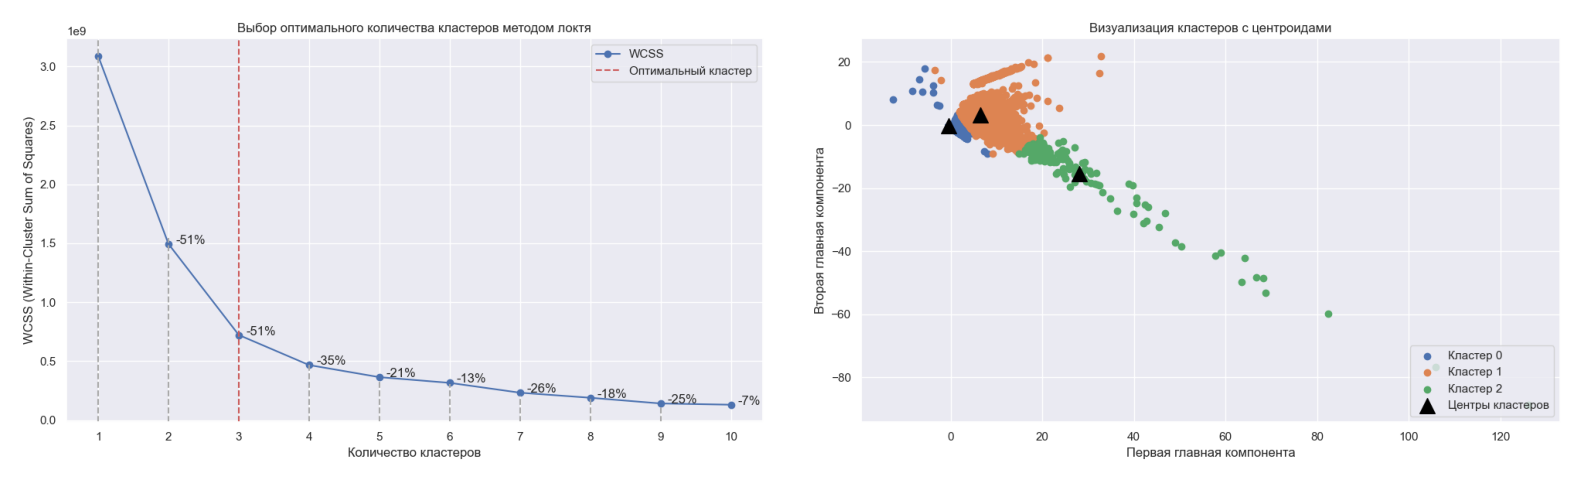

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(wcss_img)
axes[0].axis("off")
axes[1].imshow(cluster_img)
axes[1].axis("off")
plt.tight_layout()
plt.show()

In [51]:
import phik

sns.heatmap(df.phik_matrix())

interval columns not set, guessing: ['Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)', 'Отказы (%)', 'Глубина (стр.)', 'Прибыль (руб.)', 'cluster_id', '№ Группы']


AttributeError: `scipy.stats.mvn` has no attribute `mvnun`; furthermore, `scipy.stats.mvn` is deprecated and will be removed in SciPy 2.0.0.

In [30]:
df_cluster_0 = df[df["cluster_id"]==0].copy()
df_cluster_1 = df[df["cluster_id"]==1].copy()
df_cluster_2 = df[df["cluster_id"]==2].copy()
df["cluster_id"].value_counts().reset_index()

,cluster_id,count
0,0,71496
1,1,4047
2,2,140


In [46]:
df_cluster_1.describe()

,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Отказы (%),Глубина (стр.),Прибыль (руб.),cluster_id,№ Группы
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.0,4.047000e+03
mean,130.354089,130.354089,1.750927,15.747144,15.747144,26.451596,16.345387,19.398317,29.400672,1.352357,-23.980630,1.0,5.297166e+09
std,213.450914,213.450914,1.530133,27.506885,27.506885,26.197550,12.340373,14.833893,41.470782,1.479907,71.398395,0.0,8.736920e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-215.690000,1.0,5.297166e+09
25%,8.000000,8.000000,1.000000,1.180000,1.180000,10.365000,7.990000,9.350000,0.000000,1.000000,-31.945000,1.0,5.297166e+09
50%,43.000000,43.000000,1.000000,3.120000,3.120000,18.760000,13.570000,16.130000,0.000000,1.000000,-18.750000,1.0,5.297166e+09
75%,153.000000,153.000000,2.000000,14.290000,14.290000,31.980000,21.170000,25.205000,50.000000,2.000000,-10.320000,1.0,5.297166e+09
max,2023.000000,2023.000000,17.000000,100.000000,100.000000,215.690000,178.320000,198.690000,100.000000,17.000000,1974.220000,1.0,5.297166e+09


In [14]:
df_cluster_1.sort_values(by="wCTR (%)", ascending=False).head()

,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Отказы (%),Глубина (стр.),Прибыль (руб.),cluster_id,№ Группы,№ Объявления,Пол,Возраст,Уровень платежеспособности
40352,3.0,3.0,2.0,66.67,66.67,5.18,2.59,2.81,100.0,1.0,-5.18,1,5297165591,M-15104907111,мужской,не определен,Остальные
40453,3.0,3.0,2.0,66.67,66.67,11.08,5.54,6.16,100.0,1.0,-11.08,1,5297165591,M-15104907111,женский,25-34,Остальные
55942,3.0,3.0,2.0,66.67,66.67,54.03,27.01,27.29,100.0,1.0,-54.03,1,5297165591,M-15104907111,мужской,35-44,Остальные
39068,2.0,2.0,1.0,50.00,50.00,5.67,5.67,6.44,100.0,1.0,-5.67,1,5297165583,M-15104907087,женский,25-34,Остальные
618,2.0,2.0,1.0,50.00,50.00,22.72,22.72,28.83,100.0,1.0,-22.72,1,5297165575,M-15104907063,не определен,не определен,Остальные
